In [50]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [51]:
plt.style.use('ggplot')

In [52]:
df = pd.read_csv('theme_vectors.csv', 
                 index_col=0, engine='python', encoding='utf-8')#error_bad_lines=False)
df.head(5)

,theme,vector
0,방탄소년단,[ 3702.71361866 -3071.0111137 -1349.919607...
1,5G,[-11977.931703 -26162.11734265 8387.829547...
2,보톡스,[-16138.66398151 -16810.15494401 3756.155382...
3,마스크,[ -5406.00566113 -6923.9383927 -450.778381...
4,원격진료,[-19031.72115371 -22262.26290228 15539.162189...


In [53]:
#데이터 input에 맞게 정리
theme_list = df.theme.tolist()
feature = df['vector'].tolist()

vector_list = []
for i in range(len(feature)):
    k = feature[i].replace('\n', '').replace('[','').replace(']','').split()
    vector_list.append(k)

In [54]:
#차원축소 T-SNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(vector_list)
xs = transformed[:,0]
ys = transformed[:,1]

In [55]:
#2차원 + 이름 띄우는 함수
def plot_2d_graph(vocabs, xs, ys, cc=[1]):
    plt.figure(figsize=(15,15))
    if len(cc) ==1:
        #g = sns.FacetGrid(df)
        #g.map(plt.scatter, 'x', 'y')
        plt.scatter(xs,ys,marker = 'o')
    else:
        #g = sns.FacetGrid(df, c=cc)
        #g.map(plt.scatter, 'x', 'y')
        plt.scatter(xs,ys,marker = 'o',c=cc)
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


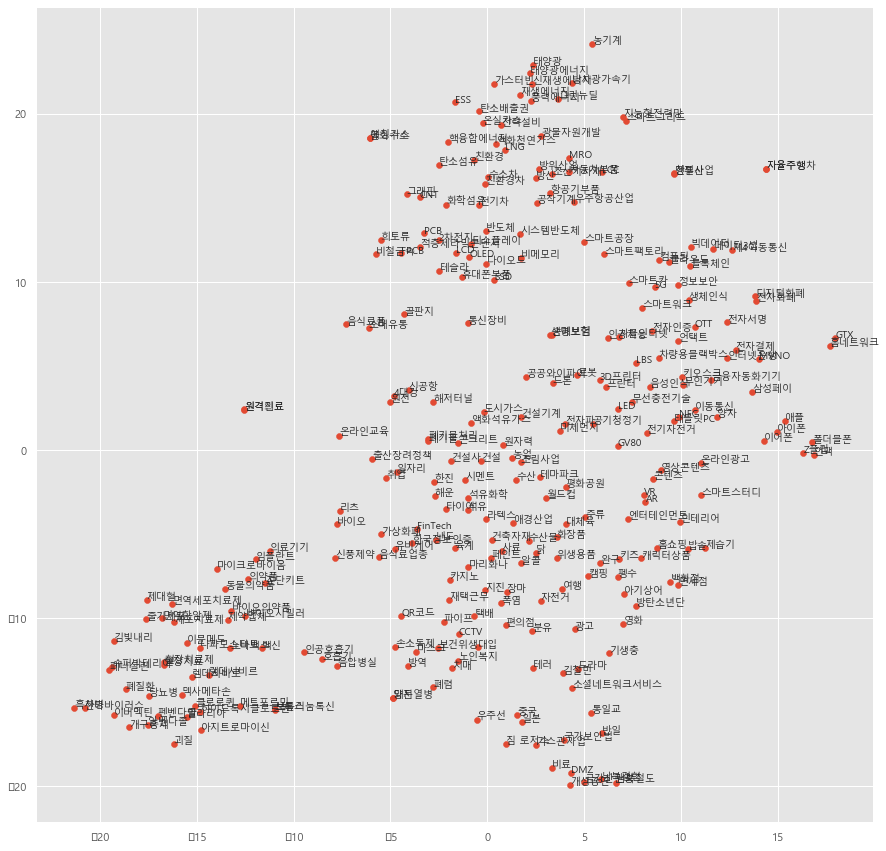

In [56]:
#plot
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['figure.figsize'] 
plot_2d_graph(theme_list,xs,ys)
plt.show()

In [57]:
#clustering
kmeans = KMeans(n_clusters=13).fit(df)
label = kmeans.labels_

ValueError: could not convert string to float: '[ -7759.75796472 -29532.94975206  11653.321479    14086.05306846\n    -78.93958542   4575.01391775  -4437.05369397 -20175.68346823\n -18394.57984975   5444.08438178  19795.73932288   1397.66205175\n  19044.8784336   10181.376974    -9380.34449478   8698.74536289\n  12990.18119393  -5826.60485185  27518.58299162  11876.84475141\n  -1461.29447697  12523.99431568   9911.60155286  -9772.57184853\n  -1485.97670585  -7283.68146316 -14886.75160553   8087.96805858\n  11997.99664777  -5585.3853831    9907.08155095  -8475.34752091\n   9858.88409781  -3939.3822029     372.90379637  -9363.57082411\n  16723.0578482   -2001.47827397 -10009.53195585  -2931.30846411\n -12814.10066634  -8140.60247156   5440.86022621 -23767.58994212\n   4452.9320533    6130.39291153 -16174.82664465  14731.89952422\n  15021.09902978  -9649.18806705  10762.39829071  -9758.32573587\n  -4606.61465083  -7071.43540897  -8676.46484553  -4077.45690799\n   6990.58506605   8649.46892011  10527.5080186  -17645.3136627\n -14162.33956507 -20586.75507771  -5211.73143074    649.15318177\n  -6462.97114388  36210.51881299   3558.67059394  -3483.65064463\n   3250.90326651  -7003.80454265 -16250.07927689   2702.27036839\n   7588.7677024   21722.75784848  28502.01988576 -11406.87171035\n -31197.95251308   6900.44606571   7345.40189209    701.16965683\n -12568.44087999  10694.65201501  -5683.14526039   1692.85714659\n  13989.65041112    958.34993528  -7174.5446324  -26206.62911776\n -10031.8927945   27724.89927288  23222.03412947 -12590.74847779\n  -6361.05113293   4509.13283834   -453.28815047  11976.93452129\n   5507.5953462    8586.34479035   1083.25249233  18208.94044233]'

In [ ]:
#clustering plot
plt.rcParams['font.family'] = 'Malgun Gothic'
plot_2d_graph(theme_list,xs,ys, label)

#plt.savefig('cluster,png')
plt.show()